## 1. 
Try to bulid a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

In [1]:
import sklearn as skl
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
X, y = mnist.data, mnist.target
print(X.shape, y.shape)


(70000, 784) (70000,)


In [3]:
#split train/test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [4]:
#Start by training a simple KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

#Print the train accuracy
y_train_pred = knn_clf.predict(X_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))




0.9819166666666667


In [5]:
#Calculate out-of-sample accuracy with cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(knn_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.9676 , 0.9671 , 0.96755])

So, as we can see, we have a out-of-sample prediction accuracy slightly less than  97%. Lets use gridsearch and see if we can increase this value, as suggested

In [6]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [4, 6, 8]}]

grid_search = GridSearchCV(knn_clf, param_grid, cv = 3, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [7]:
#Lets check our best score result:
print(grid_search.best_score_)
best_estimator = grid_search.best_estimator_

#check accuracy on cross validation
cross_val_score(best_estimator, X_train, y_train, cv = 3, scoring = "accuracy")

0.9703500000000002


array([0.9709 , 0.9698 , 0.97035])

Before calculating accuracy on test set, lets try a random forest classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

#Calculate out-of-sample accuracy with cross-validation
cross_val_score(rf_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.96525, 0.9637 , 0.96615])

In [38]:
#Since we got low accuracy, lets try to tune the hyperparameters with grid search
param_grid = [{'n_estimators': [10, 50, 100], 'max_features': [5, 10, 50, 100]}]
grid_search_rf = GridSearchCV(rf_clf, param_grid, cv =3, scoring = "accuracy")
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)

C:\Users\xande\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_features': 50, 'n_estimators': 100}
0.9648333333333333


In [39]:
#So out best model remains the KNN with 97.03% accuracy
#Lets check the accuracy on the test set
y_test_pred = best_estimator.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.9714


## 2) 
Write a function that can shift MNIST image in any directions (left, right, up or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called *data augmentation* or *training set expansion*

In [80]:
import scipy
from scipy.ndimage import shift

X_train_right = [shift(image.reshape(28,28), (0,1)).reshape(784) for image in X_train]
X_train_left = [shift(image.reshape(28,28), (0,-1)).reshape(784) for image in X_train]
X_train_up = [shift(image.reshape(28,28), (1,0)).reshape(784) for image in X_train]
X_train_down = [shift(image.reshape(28,28), (-1,0)).reshape(784) for image in X_train]

X_test_right = [shift(image.reshape(28,28), (0,1)).reshape(784) for image in X_test]
X_test_left = [shift(image.reshape(28,28), (0,-1)).reshape(784) for image in X_test]
X_test_up = [shift(image.reshape(28,28), (1,0)).reshape(784) for image in X_test]
X_test_down = [shift(image.reshape(28,28), (-1,0)).reshape(784) for image in X_test]


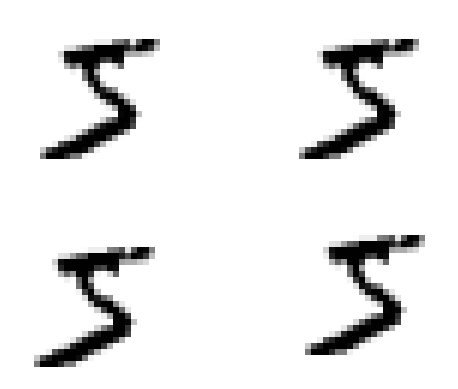

In [81]:
#Use the authors plot function to see shifted image
import matplotlib.pyplot as plt

def plot_digit(image):
    image = image.reshape(28,28)
    plt.imshow(image, cmap = "binary")
    plt.axis("off")

fig, axs = plt.subplots(nrows = 2, ncols = 2)
plt.subplot(2,2,1); plot_digit(X_train_right[0])
plt.subplot(2,2,2); plot_digit(X_train_left[0])
plt.subplot(2,2,3); plot_digit(X_train_up[0])
plt.subplot(2,2,4); plot_digit(X_train_down[0])

plt.show()

Since it is working just fine, lets estimate the model with the augmented data

In [82]:
X_train_aug = X_train + X_train_right + X_train_left + X_train_up + X_train_down
X_test_aug = X_test + X_test_right + X_test_left + X_test_up + X_test_down

best_estimator.fit(X_train_aug, y_train)
y_test_pred_aug = best_estimator.predict(X_test_aug)
print(accuracy_score(y_test, y_test_pred_aug))

0.9761


## 3.
Tackle the Titanic dataset. A great place to start in on Kaggle. Alternatively, you can download the data from [Here]("https://homl.info/titanic.tgz") and unzip this tarball like you did for the housing data in Chapter 2. This will give you two CSV files, train.csv and test.csv, which you can load using panda.read.csv. The goal is to train a classifier that can predict the Survived column based on the other columns

In [84]:
#Download Titanic data using an API
import opendatasets as od
import pandas as plot_digit
od.download("https://www.kaggle.com/c/titanic")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading titanic.zip to .\titanic


100%|██████████| 34.1k/34.1k [00:00<00:00, 479kB/s]


Extracting archive .\titanic/titanic.zip to .\titanic


In [1]:
import pandas as pd
# Load the train and test datasets
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

X_train = train.drop("Survived", axis = 1)
y_train = train["Survived"]
X_test = test

#Create a column indicating if the passenger has a cabin
X_train['HasCabin'] = X_train['Cabin'].isnull() == False
X_test['HasCabin'] = X_test['Cabin'].isnull() == False

print(X_train.head())



   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   HasCabin  
0     False  
1      True  
2     False  
3      True  
4     False  


In [2]:
#See if we have missing values
print(X_train.shape, X_test.shape)
X_train.info()

(891, 12) (418, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  HasCabin     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 77.6+ KB


Since we have some missing data, we should inpute something to not miss these rows. Lets use the nearest neighbors values. Note that it will only work for the Age column, since Cabin and Embarked are not numeric variables, so we must create a pipeline for numerical and another for categorical variables

In [3]:
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

#Create pipelines
from sklearn.pipeline import Pipeline
#pipeline for numerical attributes
num_pipeline = Pipeline([
    ('impute', KNNImputer(n_neighbors=2)),
    ('standardize', StandardScaler())
])

#pipeline for categorical attributes
cat_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy = "constant", fill_value = "missing")),
    ("one-hot", OneHotEncoder(sparse_output=False))
])

#also define some columns to drop and categorical variables to keep
columns_to_drop = ["Name", "Ticket", "Cabin"]
cat_var_keep = ["Sex", "Embarked"]

#create aggregate pipeline
preprocessor = ColumnTransformer([
    ('column_dropper', 'drop', columns_to_drop),
    ('num', num_pipeline, selector(dtype_include = np.number)),
    ('cat', cat_pipeline, cat_var_keep)
], remainder = 'passthrough')

#Now we are ready to preprocess our data
X_train_prep = preprocessor.fit_transform(X_train)
X_train_prep

array([[-1.73010796,  0.82737724, -0.562414  , ...,  1.        ,
         0.        ,  0.        ],
       [-1.72622007, -1.56610693,  0.60893948, ...,  0.        ,
         0.        ,  1.        ],
       [-1.72233219,  0.82737724, -0.26957563, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.72233219,  0.82737724,  0.20628672, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.72622007, -1.56610693, -0.26957563, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.73010796,  0.82737724,  0.16968192, ...,  0.        ,
         0.        ,  0.        ]])

Lets train some classification models and choose the best

In [27]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#RF pipeline with grid search
rf_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("random_forest", RandomForestClassifier(random_state = 50))
])
param_grid = [{'random_forest__max_features':[2,4,6]}]
grid_search_rf = GridSearchCV(rf_pipeline, param_grid, cv =10, scoring = "accuracy")
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)
best_rf = grid_search_rf.best_estimator_

{'random_forest__max_features': 2}
0.818214731585518


An ok classification with Random Forest. Lets try a logistic regression

In [26]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#lf pipeline
rf_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("logistic_reg", LogisticRegression())
])

from sklearn.model_selection import cross_val_score
cross_val_score(rf_pipeline, X_train, y_train, cv = 10, scoring = "accuracy").mean()

np.float64(0.7923470661672909)

An even worse classification with a logistic regression. Lets try a SGD, with both lasso and ridge regularization

In [25]:
from sklearn.linear_model import SGDClassifier
sgd_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("sgd_class", SGDClassifier(random_state = 50))
])
param_grid = [{'sgd_class__penalty': ['l2','l1'],
               'sgd_class__loss': ['hinge', 'log_loss', 'perceptron']}]
grid_search_sgd = GridSearchCV(sgd_pipeline, param_grid, cv = 10, scoring = "accuracy")
grid_search_sgd.fit(X_train, y_train)
print(grid_search_sgd.best_params_)
print(grid_search_sgd.best_score_)
best_sgd = grid_search_sgd.best_estimator_

{'sgd_class__loss': 'log_loss', 'sgd_class__penalty': 'l1'}
0.7900749063670411


Even Worse. Finally, lets try a Support Vector Classifier

In [24]:
from sklearn.svm import SVC
svc_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ('svc_class', SVC(random_state = 50))

])
param_grid = [{
    'svc_class__kernel' : ['rbf', 'linear', 'poly'],
    'svc_class__gamma' : ['scale', 'auto']
}]
grid_search_svc = GridSearchCV(svc_pipeline, param_grid, cv = 10, scoring = "accuracy")
grid_search_svc.fit(X_train, y_train)
print(grid_search_svc.best_params_)
print(grid_search_svc.best_score_)
best_svc = grid_search_svc.best_estimator_

{'svc_class__gamma': 'auto', 'svc_class__kernel': 'rbf'}
0.8249313358302122


## 4. Build a Spam classifier

a) Download examples of spam and ham from [Here](https://spamassassin.apache.org/old/publiccorpus/)

## I REMAIN TO FINISH THIS QUESTION


In [ ]:
import requests
import tarfile

url = 'https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2'
target_path = '../datasets/20021010_easy_ham.tar.bz2'

#get data
response = requests.get(url, stream = True)
#save data local
with(open(target_path, 'wb')) as file:
    file.write(response.raw.read())

#unzip and extract
with tarfile.open(target_path, 'r:bz2') as tar:
    tar.extractall()


